# Back Propagation and hyper parameter tuning in Neural networks

### Gradient descent for forward propagation:

training refers to the task of finding the optimal combination of weights and biases to minimize the total loss (with a fixed set of hyperparameters).

This optimization is achieved using the familiar **gradient descent** algorithm.

For a neural network, you will learn how the loss function is minimized using the gradient descent function by finding the optimum values of weights and biases using **backpropagation**.

the gradient descent algorithm presents us with the following parameter update equation:

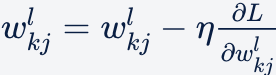

where k and j are the indices of the weight in the weight matrix and l is the index of the layer to which it belongs.

for the following network:

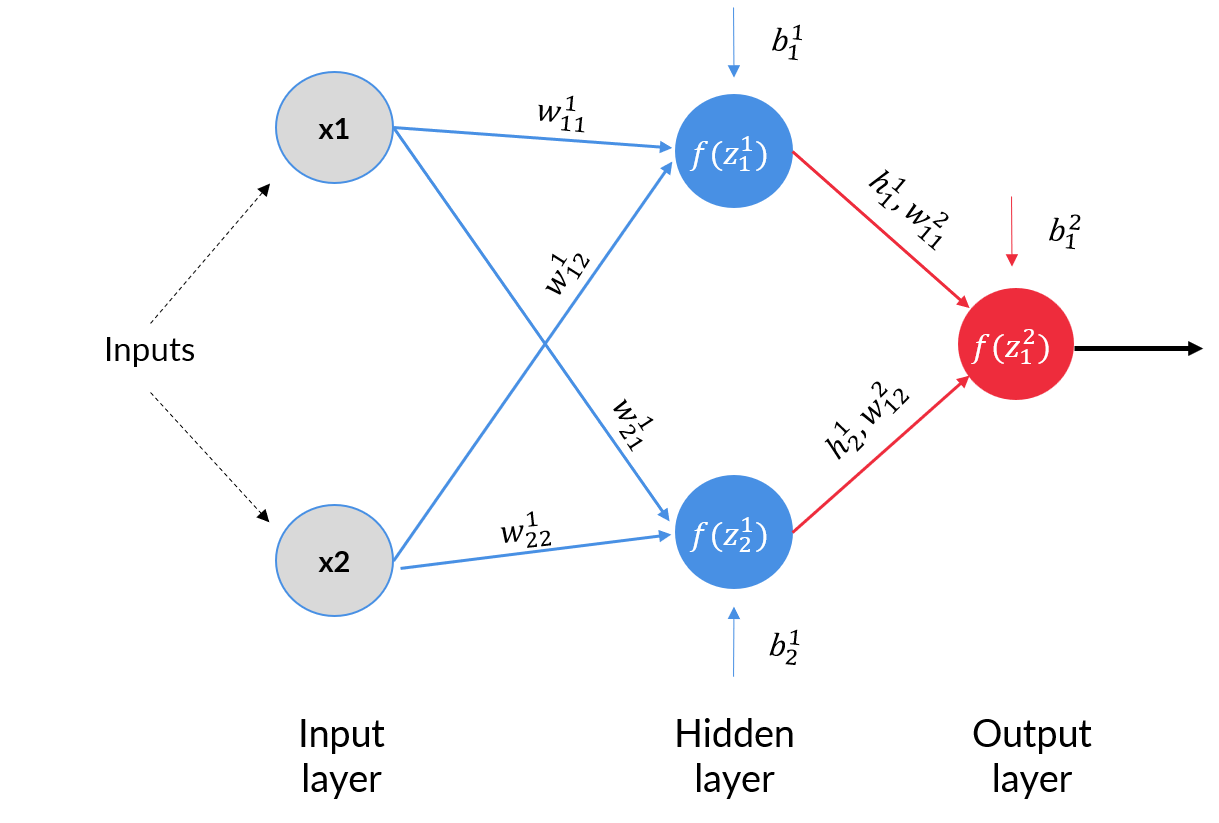

for the output layer, the weight and bias terms to be updated are as follows:

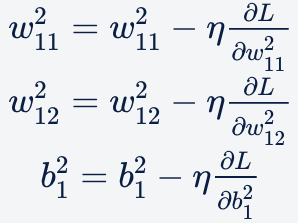

and for the hidden layer, the weights and bias terms are updated using the following equations:

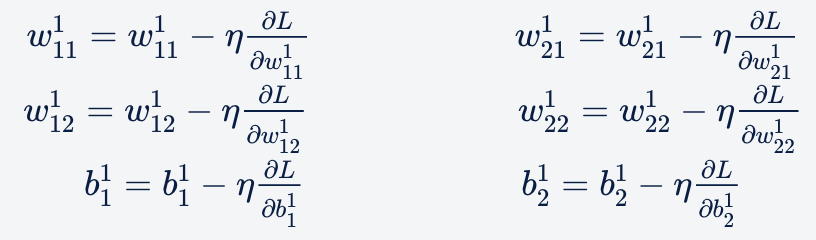

to compute these, we use backpropagation algorithm:

the simplified network of the above NN can be assumed as

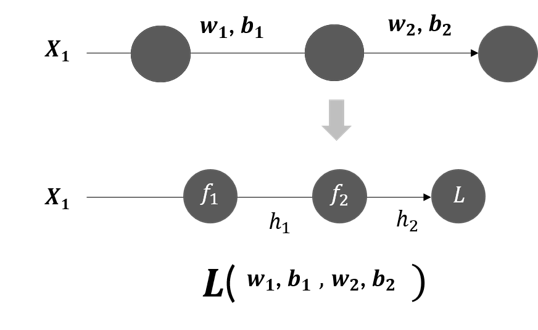

as we can see from the above, the loss function in this case is a function of w1, b1, w2, b2.

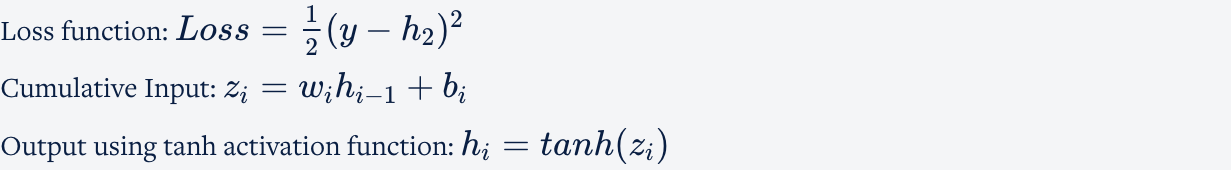

**assuming the loss function as Mean squared error and activation function is tanh() function.**

now let's compute the gradient of the loss function with respect to one of the weights:
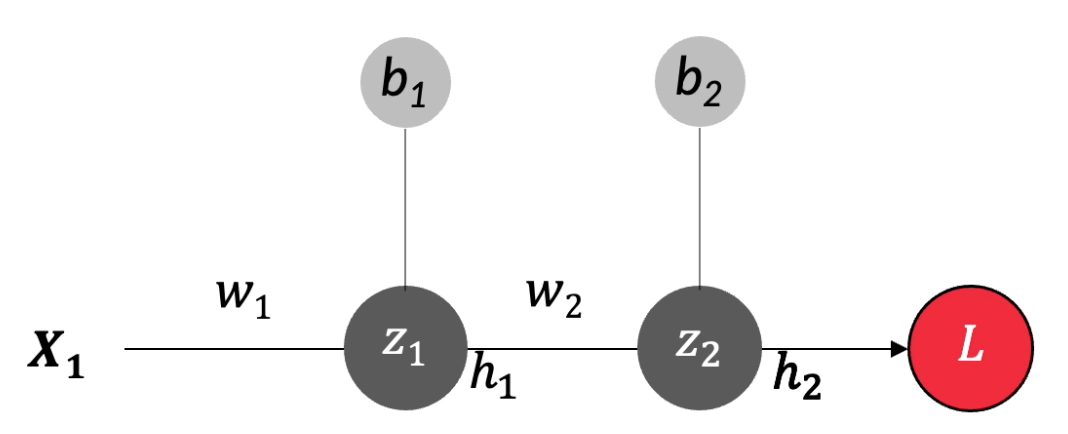

by chain rule, we can say:

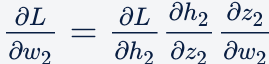

changing w2 inturn changes the value of z2, which in turn changes the value of h2, which in turn changes the value of L.

the above chain rule can be adjusted as:

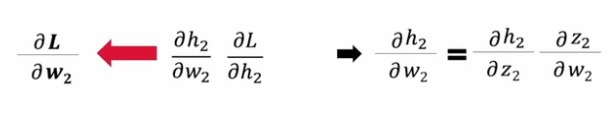

Now, we'll compute the terms of the above chain rule formula:

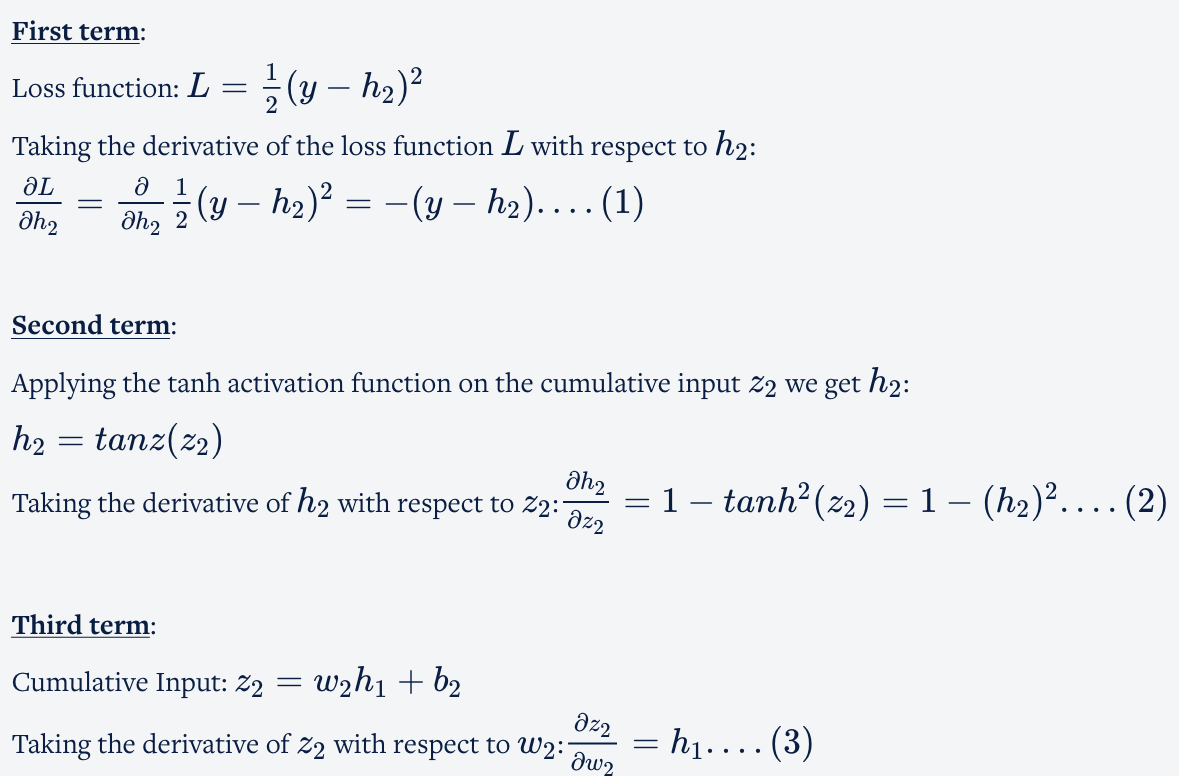

substituting the above three terms, we'll get:

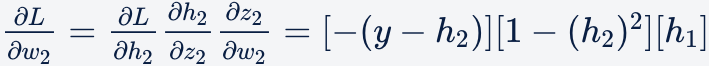

similarly compute the gradient of all weights and biases with respect to loss function as in the above step.

if there are three neurons instead of 2:

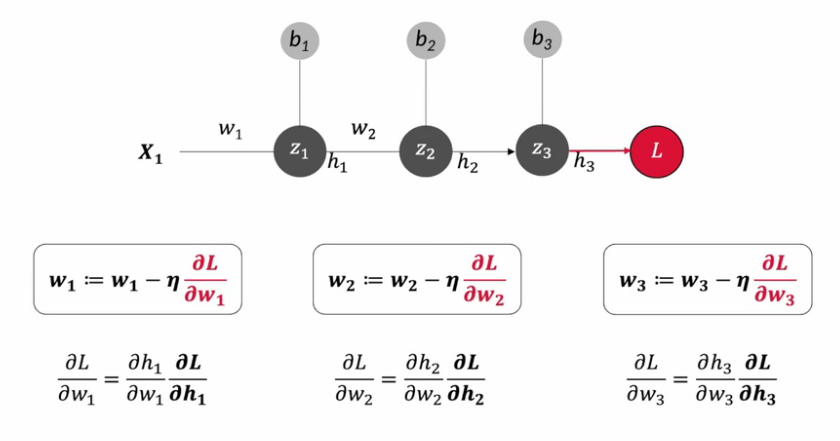

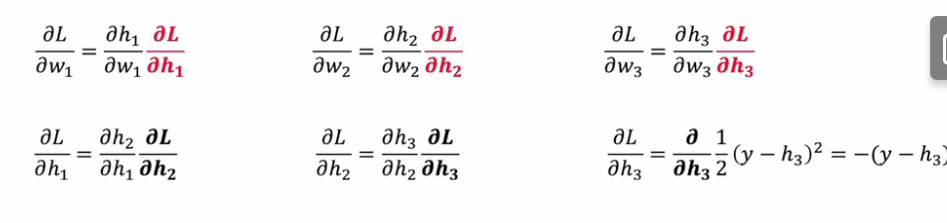

**we can observe a pattern here, in order to compute the gradient of the first layer, we need to know the gradient of the succeeding layer. in other words, it is relatively easy to calculate the gradient of the outermost layer and travel backwards using the recursive function to the first layer.**

extending the above principle to n neurons:

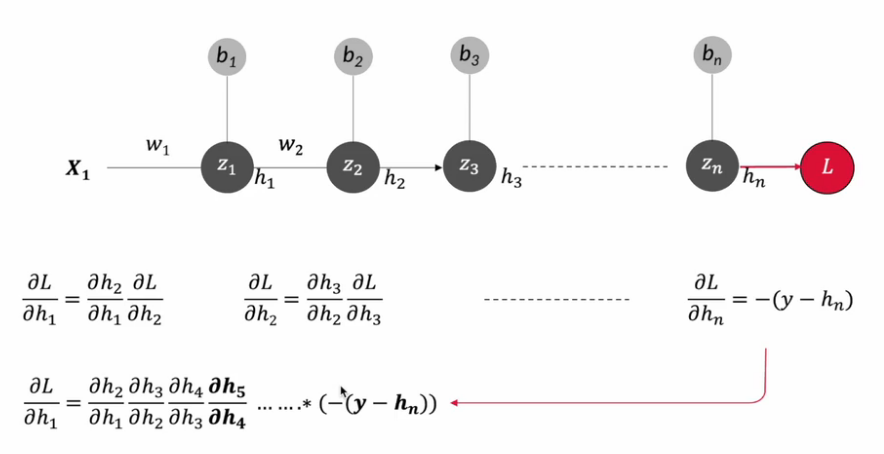

**Once the gradients of all the weights and biases are computed, the gradient descent update equation can be used to obtain the updated values of the weights and biases.**

**NOTE:** in the regression problem, the activation function used is identity. and hence the value of the activation 'h' and the value of 'z' is same.

**Q: What we did in Forward Pass and Back propagation to see the the weights and biases being updated for all layers and neurons in neural network?**

We took the following steps when passing an input through the network: 

1. Forward propagation of the input through the network with random initial values for weights and biases.

2. Making a prediction and computing the overall loss.

3. Updating model parameters using backpropagation i.e., updating the weights and biases in the network, using gradient descent.

4. Forward propagation of the input through the network with updated parameters leading to a decrease in the overall loss. 

5. Repeat the process until the optimum values of weights and biases are obtained such that the model makes acceptable predictions.

The pseudocode/pseudo-algorithm is given as follows:

1. Initialise with the input 

**Forward Propagation**

2. For each layer, compute the cumulative input and apply the non-linear activation function on the cumulative input of each neuron of each layer to get the output.
3. For classification, get the probabilities of the observation belonging to a class, and for regression, compute the numeric output.
4. Assess the performance of the neural network through a loss function, for example, a cross-entropy loss function for classification and RMSE for regression.

**Backpropagation**

5. From the last layer to the first layer, for each layer, compute the gradient of the loss function with respect to the weights at each layer and all the intermediate gradients.
6. Once all the gradients of the loss with respect to the weights (and biases) are obtained, use an optimisation technique like gradient descent to update the values of the weights and biases.

**Repeat this process until the model gives acceptable predictions:**

7. Repeat the process for a specified number of iterations or until the predictions made by the model are acceptable. 

# Tensorflow

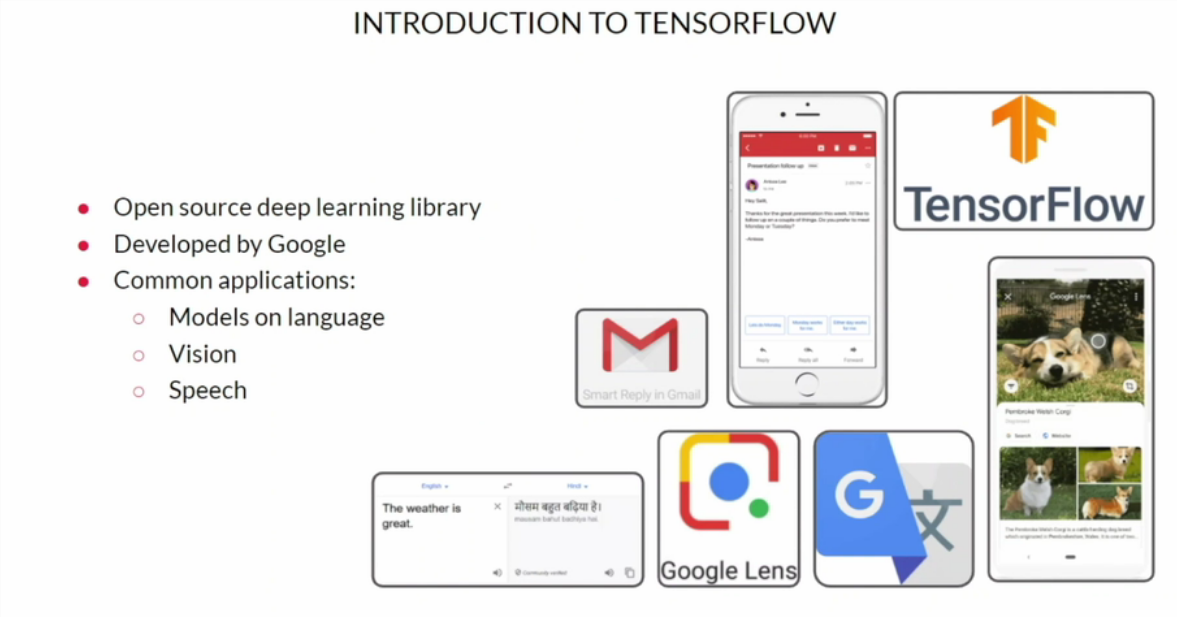

A tensor is the fundamental data structure used in TensorFlow. It is a multidimensional array with a uniform data type. The data type for an entire tensor is the same. 

**Rank of a Tensor = number of axes of a tensor**

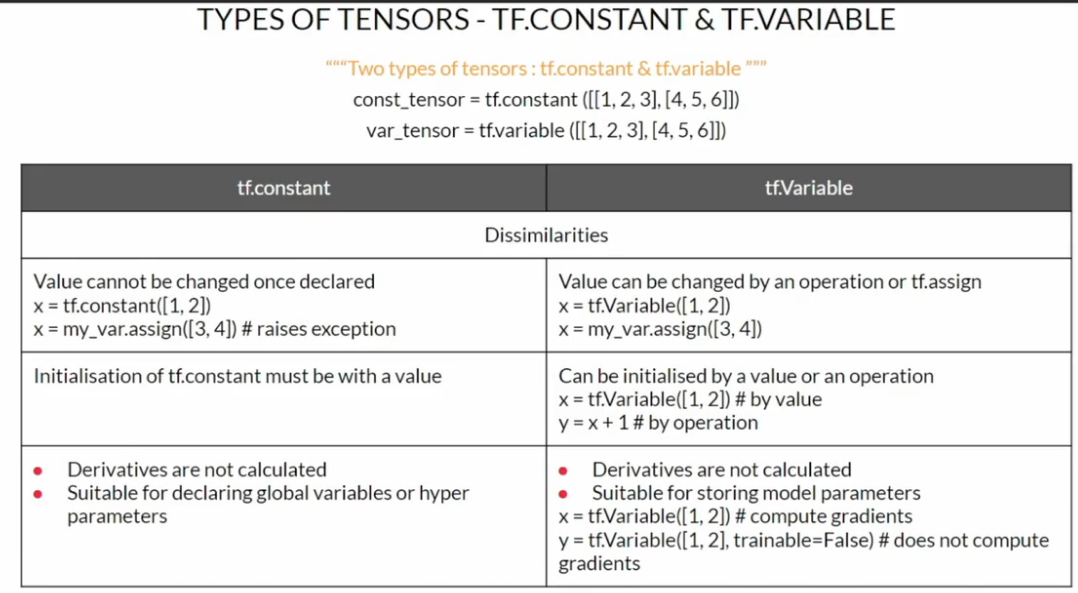

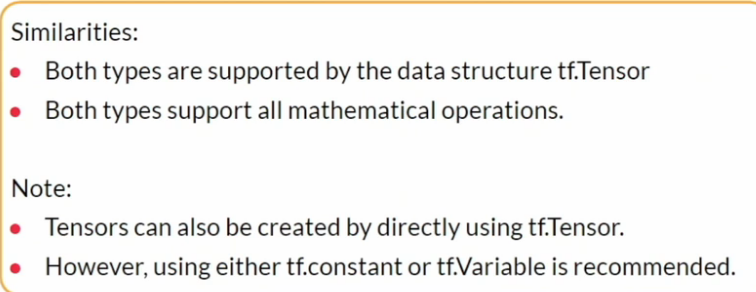

since the values of a tf.Varibale can be changed, we can calculate the derivates of the variables. Therefore the statement 'Derivatives are not calculated for tf.Variables' is incorrect.

in summary:
1. the value of constant tensor cannot be changed while variable tensor can be changed.
2. constant tensor need to be declared by values while defining the tensor, while variable tensors can be declared later using operations.
3. differentiation is calculated for variable tensor only and the gradient ignores constant while differentiating.

tf.constant is similar to tf.Tensor; both of them have immutable values, but tf.Variable differs from both. Whenever you declare a tensor with tf.constant, it will be an object of the tf.tensor type compared with tf.Variable, which is a different object altogether. You can visit the [tf.constant](https://www.tensorflow.org/api_docs/python/tf/constant) page of the documentation to understand this better.

* Videos are made up of continuously changing images. Rank-3 tensors are sufficient to capture information from each image. The fourth dimension will be used to store timestamps.

* usually learning rates and actual labels of the data are stored in the tf.constant tensor as they are usually constant and don't change through out the process.

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np

In [3]:
vector_tf = tf.constant([0,1,2,3,4])
vector_tf.shape

TensorShape([5])

In [4]:
t3_tf = tf.constant([[[1,2],[3,4],[5,6]]]*5)
t3_tf

<tf.Tensor: shape=(5, 3, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4],
        [5, 6]],

       [[1, 2],
        [3, 4],
        [5, 6]],

       [[1, 2],
        [3, 4],
        [5, 6]],

       [[1, 2],
        [3, 4],
        [5, 6]],

       [[1, 2],
        [3, 4],
        [5, 6]]], dtype=int32)>

In [5]:
t31_tf = tf.constant([[[1., 2.], [3, 4], [5, 6]]]*5)
t31_tf

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[1., 2.],
        [3., 4.],
        [5., 6.]],

       [[1., 2.],
        [3., 4.],
        [5., 6.]],

       [[1., 2.],
        [3., 4.],
        [5., 6.]],

       [[1., 2.],
        [3., 4.],
        [5., 6.]],

       [[1., 2.],
        [3., 4.],
        [5., 6.]]], dtype=float32)>

Let’s summarise what was covered in the video: 

1. You can use tf.Variable in the same way as tf.constant to initialise a tensor with the values that you can pass in a list. However, in the case of variables, these values can be changed later as well.

2. You can also specify the data type while initialising the tensor. In this way, you can be sure of the data type. Although this might seem trivial now, in the upcoming segments, you will learn about the importance of declaring the data type.

3. You can access the values of a tensor directly using the .numpy() function. It will return the values of the tensor as a NumPy array. 

In [7]:
int_tensor = tf.constant([[1,2,3],[4,5,6]], dtype=tf.int32)
float_tensor = tf.constant([[1,2,3],[4,5,6]], dtype= tf.float32)
bool_tensor = tf.constant([[True, False, False]], dtype=tf.bool)

print("integer tensor: ",int_tensor)
print("float tensor: ",float_tensor)
print("boolean tensor: ",bool_tensor)


integer tensor:  tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
float tensor:  tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
boolean tensor:  tf.Tensor([[ True False False]], shape=(1, 3), dtype=bool)


In [8]:
int_tensor.numpy()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

**Question**
Declare a tensor of shape (2,2,2,2) with random numners from normal distrinition whose mean is 0 and standard deviation is also 1.

In [21]:
# approach 1 - initialize the ndarray in Numpy and then use that ot initialize the tensor 
arr = np.random.randn(2,2,2,2) #returns random numbers with mean 0 and standard deviation 1

arr_tf = tf.constant(arr)
print(arr_tf)


tf.Tensor(
[[[[ 0.54488707 -0.38556809]
   [-0.90902098 -0.44855253]]

  [[ 0.17445352  1.7390995 ]
   [ 1.22210352 -0.35448079]]]


 [[[-0.38637909  1.22451055]
   [-0.35770207  1.39841726]]

  [[-0.95072449  0.06056642]
   [ 1.3817956   0.0983017 ]]]], shape=(2, 2, 2, 2), dtype=float64)


In [16]:
arr = arr+1 # adding 1 makes the random numbers from normal distribution with mean 0 to mean 1
arr_tf = tf.constant(arr)
print(arr_tf)


tf.Tensor(
[[[[ 0.68089357  1.94944552]
   [ 1.31143562  0.67845001]]

  [[ 0.77499379  0.31007097]
   [ 0.19772531  2.80807605]]]


 [[[ 2.37417557  0.09205386]
   [ 0.58665158  1.19676908]]

  [[-0.07768027  2.06676972]
   [ 1.64770725  2.16648582]]]], shape=(2, 2, 2, 2), dtype=float64)


In [18]:
# to change the sgtandard deviation as well, multiply with the new standard deviation say std=2.5
arr = 2.5*arr
arr_tf = tf.constant(arr)
print(arr_tf)

tf.Tensor(
[[[[ 3.25696171 -2.77633206]
   [-2.30338697  4.29729873]]

  [[ 0.12294635  0.62098878]
   [ 6.10256084 -0.3390366 ]]]


 [[[-0.08756365 -1.7855077 ]
   [ 1.58650249  0.57519033]]

  [[-1.99702772 -3.62182369]
   [-0.12349674 -4.47989686]]]], shape=(2, 2, 2, 2), dtype=float64)


In [22]:
# to change both mean and standard deviation at the same time, simply multiply with the new std.deviation and add a constant to change the mean
arr = 2.5*arr+1
arr_tf = tf.constant(arr)
print(arr_tf)

tf.Tensor(
[[[[ 2.36221767  0.03607979]
   [-1.27255246 -0.12138131]]

  [[ 1.43613381  5.34774876]
   [ 4.05525881  0.11379803]]]


 [[[ 0.03405228  4.06127637]
   [ 0.10574481  4.49604314]]

  [[-1.37681123  1.15141605]
   [ 4.45448901  1.24575424]]]], shape=(2, 2, 2, 2), dtype=float64)


In [24]:
# approach 2: using random number generating functions.
arr_tf = tf.random.normal((2,2,2,2), mean=1, stddev=1, name="my_tensor")
print(arr_tf.shape)
print(arr_tf.numpy())


(2, 2, 2, 2)
[[[[ 2.0044475   2.371787  ]
   [ 0.65020174  1.340158  ]]

  [[-0.5403248  -1.4857435 ]
   [ 2.3065567   0.72981787]]]


 [[[ 0.64245397  0.0410192 ]
   [ 1.5443244  -0.31693804]]

  [[ 1.4103746  -0.15450442]
   [ 1.2690973   0.46660566]]]]


**NOTE:**
when you have a large data like the sales on an e-commerce website, then do the data preprocessing and all and then convert the data only before training the model as the tensors are good way to train the models on large datasets but not so good at data manipulation.

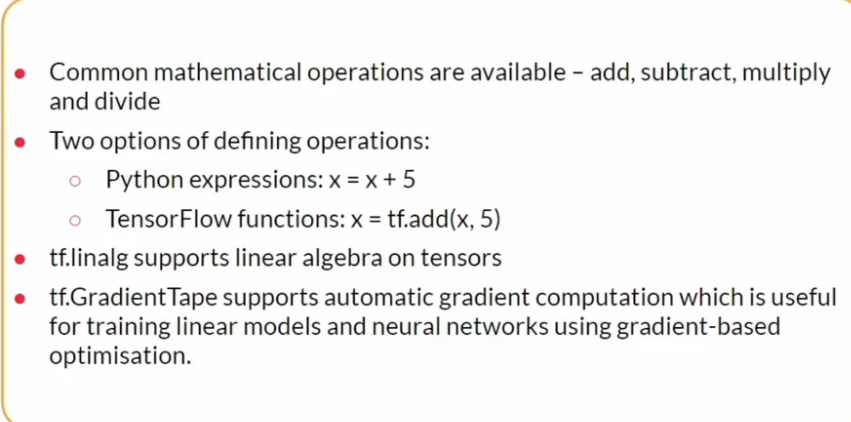

**common mathematical operations on tensors:**

In [25]:
# defining two tensors
x = tf.Variable([list(range(5))]*5)
y = tf.Variable([list(range(5,10))]*5)

print("x:",x)
print("y:",y)

x: <tf.Variable 'Variable:0' shape=(5, 5) dtype=int32, numpy=
array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]], dtype=int32)>
y: <tf.Variable 'Variable:0' shape=(5, 5) dtype=int32, numpy=
array([[5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9]], dtype=int32)>


In [28]:
# simple mathematical opertions
z=x+y
print('z = ',z)

w = z*y
print('w = ',w) #element wise multiplication

v = y/x # element wise division does not raise exception for division by 0 as tensorflow supports infinity and NaN types as can be seen from this result
print('v = ',v)

z =  tf.Tensor(
[[ 5  7  9 11 13]
 [ 5  7  9 11 13]
 [ 5  7  9 11 13]
 [ 5  7  9 11 13]
 [ 5  7  9 11 13]], shape=(5, 5), dtype=int32)
w =  tf.Tensor(
[[ 25  42  63  88 117]
 [ 25  42  63  88 117]
 [ 25  42  63  88 117]
 [ 25  42  63  88 117]
 [ 25  42  63  88 117]], shape=(5, 5), dtype=int32)
v =  tf.Tensor(
[[       inf 6.         3.5        2.66666667 2.25      ]
 [       inf 6.         3.5        2.66666667 2.25      ]
 [       inf 6.         3.5        2.66666667 2.25      ]
 [       inf 6.         3.5        2.66666667 2.25      ]
 [       inf 6.         3.5        2.66666667 2.25      ]], shape=(5, 5), dtype=float64)


### inbuilt function in tensorflow
z = tf.add(x,y)

w=tf.multiply(x,y)

v=tf.divide(y,x)

In [32]:
w = tf.Variable([[0,1,2,3],[4,5,6,7]])
u = tf.transpose(w)
print('before transpose:',w)
print('after transpose:',u)

before transpose: <tf.Variable 'Variable:0' shape=(2, 4) dtype=int32, numpy=
array([[0, 1, 2, 3],
       [4, 5, 6, 7]], dtype=int32)>
after transpose: tf.Tensor(
[[0 4]
 [1 5]
 [2 6]
 [3 7]], shape=(4, 2), dtype=int32)


In [34]:
t = u+w #will throw an error as they are not of same size

InvalidArgumentError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [4,2] vs. [2,4] [Op:AddV2] name: 

In [41]:
# question asked in the course in module
t1 = tf.random.uniform((2,2), minval=1, maxval=20, dtype=tf.int32)
t2 = tf.multiply(t1,t1)
print('tensor 1:',t1.numpy())
print('squared tensor:',t2.numpy())

tensor 1: [[ 7  6]
 [13 19]]
squared tensor: [[ 49  36]
 [169 361]]


In [42]:
t1 = tf.Variable([[2, 3, 4], [5, 7, 9], [1, 6, 3], [5, 8, 4]])
t2 = tf.Variable([[2, 3, 4, 5], [5, 7, 9, 4], [1, 6, 3, 9]])

t3 = t1 + t2

InvalidArgumentError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [4,3] vs. [3,4] [Op:AddV2] name: 

### Linear algebra in tensors

In [45]:
# matrix multiplication using matmul function in tf.linalg library!
x = tf.random.uniform((3,3),minval=1, maxval=10, dtype=tf.int32)
print('x:',x)
y = tf.random.uniform((3,3),minval=1, maxval=10, dtype=tf.int32)
print('y:',y)
z=tf.linalg.matmul(x,y)
print('matrix multiplication of x and y is :',z)

x: tf.Tensor(
[[4 1 5]
 [3 4 8]
 [5 7 4]], shape=(3, 3), dtype=int32)
y: tf.Tensor(
[[4 5 9]
 [1 8 6]
 [1 6 5]], shape=(3, 3), dtype=int32)
matrix multiplication of x and y is : tf.Tensor(
[[ 22  58  67]
 [ 24  95  91]
 [ 31 105 107]], shape=(3, 3), dtype=int32)


if shapes of tensors are not compatible for matrix multiplication, then the matmul will throw an exception!

In [46]:
# matrix inverse can be calculate using inv() function in linalg library
xinv = tf.linalg.inv(x)
z = x*xinv
print(z)

InvalidArgumentError: Value for attr 'T' of int32 is not in the list of allowed values: double, float, half, complex64, complex128
	; NodeDef: {{node MatrixInverse}}; Op<name=MatrixInverse; signature=input:T -> output:T; attr=adjoint:bool,default=false; attr=T:type,allowed=[DT_DOUBLE, DT_FLOAT, DT_HALF, DT_COMPLEX64, DT_COMPLEX128]> [Op:MatrixInverse] name: 

**the above error is thrown because matrix.inv is only possible on float data types and not on any datatypes**

So, in this video, you learnt about TensorFlow’s linalg module. Let’s summarise the concepts covered in the video:

1. The linalg module in the TensorFlow library has all the necessary functions for processing matrices. You can visit [this page](https://www.tensorflow.org/api_docs/python/tf/linalg) to read about the functions available.

2. Many matrix operations require shape compatibility. For instance, in the case of matrix multiplication, the number of columns in the first matrix needs to be equal to the number of rows in the second. Conditions such as these need to be met while performing the respective operations on tensors. If such conditions are not met, then TensorFlow will throw an error.

3. It is possible that some linear operations are not defined. For example, all the matrices cannot be inverted. In such cases as well, TensorFlow will throw an error. So, to perform a matrix operation, that operation should be mathematically possible. For example, it is not possible to calculate the inverse of a matrix with the determinant 0. It will not be possible in TensorFlow either.

4. TensorFlow uses numerical algorithms for carrying out matrix operations. So, it is important to have a tensor that is of the float data type.

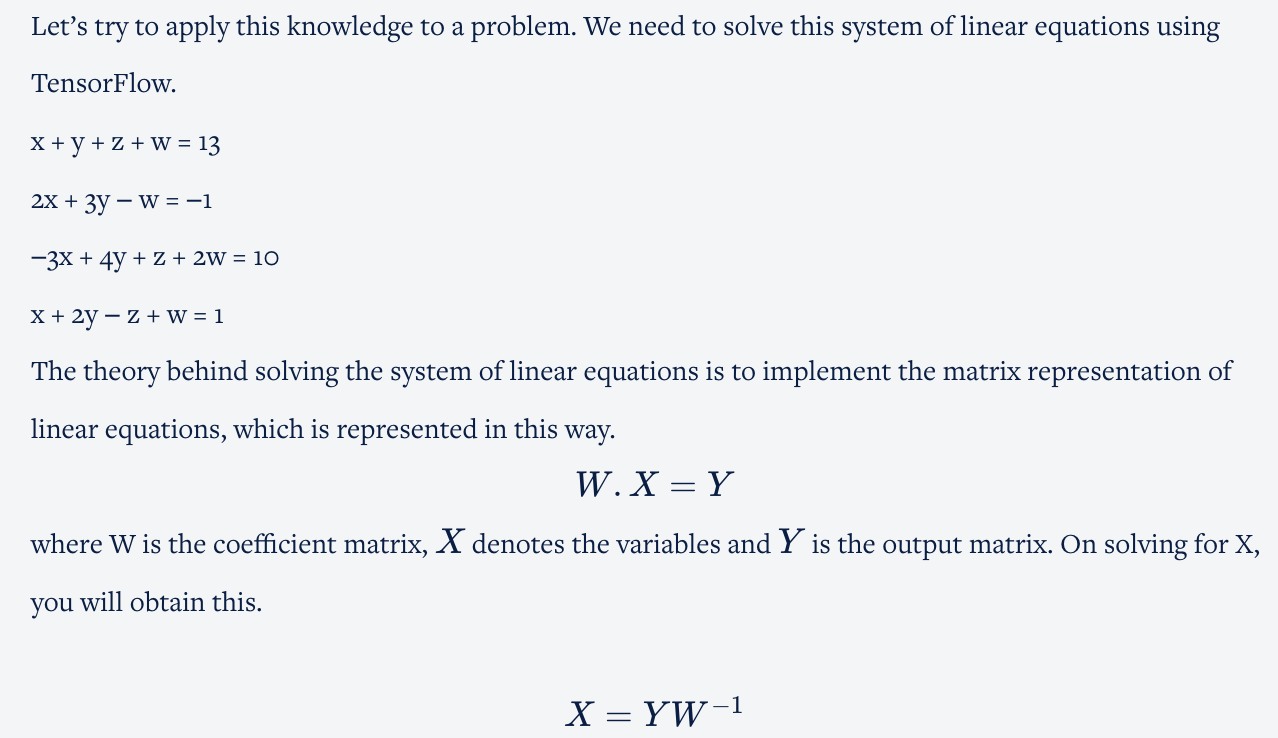

In [54]:
coeff = tf.Variable([[1,1,1,1],[2,3,0,-1],[-3,4,1,2],[1,2,-1,1]], dtype=tf.float32)
print('coefficient matrix:',coeff)
y = tf.Variable([[13],[-1],[10],[1]], dtype=tf.float32)
print('RHS value matrix:', y)
coeff_inv = tf.linalg.inv(coeff)
print('inverse of coefficient matrix: ',coeff_inv)
x_sol = tf.linalg.matmul(coeff_inv,y)


print('the values of x,y,z,w are: ',x_sol.numpy())

coefficient matrix: <tf.Variable 'Variable:0' shape=(4, 4) dtype=float32, numpy=
array([[ 1.,  1.,  1.,  1.],
       [ 2.,  3.,  0., -1.],
       [-3.,  4.,  1.,  2.],
       [ 1.,  2., -1.,  1.]], dtype=float32)>
RHS value matrix: <tf.Variable 'Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[13.],
       [-1.],
       [10.],
       [ 1.]], dtype=float32)>
inverse of coefficient matrix:  tf.Tensor(
[[ 2.77777791e-01  5.55555224e-02 -1.66666672e-01  1.11111104e-01]
 [-7.40740746e-02  1.85185164e-01  1.11111104e-01  3.70370336e-02]
 [ 4.62962925e-01  9.25926119e-02  5.55555634e-02 -4.81481493e-01]
 [ 3.33333343e-01 -3.33333343e-01 -9.93410776e-09  3.33333343e-01]], shape=(4, 4), dtype=float32)
the values of x,y,z,w are:  [[ 2.0000000e+00]
 [-1.0058284e-07]
 [ 5.9999995e+00]
 [ 5.0000005e+00]]


In [63]:
W = tf.Variable([[0.5],[1],[-1.2]], dtype=tf.float32)
bias = tf.Variable([[0.01]])
features = tf.Variable([[0.2,1,0.5]], dtype=tf.float32)

a = tf.add(tf.linalg.matmul(features,W),bias)
print('final matrix: ',a)

prob = tf.sigmoid(a)
print('Probability: ',prob)

final matrix:  tf.Tensor([[0.51]], shape=(1, 1), dtype=float32)
Probability:  tf.Tensor([[0.62480646]], shape=(1, 1), dtype=float32)
